In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
import seaborn as sns
%matplotlib inline

In [3]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [4]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
# Show 10 observations
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
179,180,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,male,2007
36,37,Adelie,Dream,38.8,20.0,190.0,3950.0,male,2007
44,45,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007
68,69,Adelie,Torgersen,35.9,16.6,190.0,3050.0,female,2008
27,28,Adelie,Biscoe,40.5,17.9,187.0,3200.0,female,2007
317,318,Chinstrap,Dream,46.2,17.5,187.0,3650.0,female,2008
154,155,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
290,291,Chinstrap,Dream,45.9,17.1,190.0,3575.0,female,2007
326,327,Chinstrap,Dream,48.1,16.4,199.0,3325.0,female,2009
92,93,Adelie,Dream,34.0,17.1,185.0,3400.0,female,2008


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [6]:
# Drop na values, but explain your rule of decision
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])
df = df.drop(['rowid','year'], axis=1)
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [7]:
# Get a basic summary of the data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
# How many penguins by species and island we have?
df[['species',  'island']].value_counts()

species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

In [9]:
pd.crosstab(df['species'],  [df['island'], df['species']])

island    Biscoe         Dream           Torgersen
species   Adelie Gentoo Adelie Chinstrap    Adelie
species                                           
Adelie        44      0     55         0        47
Chinstrap      0      0      0        68         0
Gentoo         0    119      0         0         0

In [10]:
# Get the basic metrics (mean, median, std, max, min) per species
print('bill_length_mm')
display(df.groupby('species')['bill_length_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('bill_depth_mm')
display(df.groupby('species')['bill_depth_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('flipper_length_mm')
display(df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('body_mass_g')
display(df.groupby('species')['body_mass_g'].agg(['mean', 'median', 'std', 'max', 'min']))

bill_length_mm


,mean,median,std,max,min
species,,,,,
Adelie,38.823973,38.85,2.662597,46.0,32.1
Chinstrap,48.833824,49.55,3.339256,58.0,40.9
Gentoo,47.568067,47.40,3.106116,59.6,40.9


bill_depth_mm


,mean,median,std,max,min
species,,,,,
Adelie,18.347260,18.40,1.219338,21.5,15.5
Chinstrap,18.420588,18.45,1.135395,20.8,16.4
Gentoo,14.996639,15.00,0.985998,17.3,13.1


flipper_length_mm


,mean,median,std,max,min
species,,,,,
Adelie,190.102740,190.0,6.521825,210.0,172.0
Chinstrap,195.823529,196.0,7.131894,212.0,178.0
Gentoo,217.235294,216.0,6.585431,231.0,203.0


body_mass_g


,mean,median,std,max,min
species,,,,,
Adelie,3706.164384,3700.0,458.620135,4775.0,2850.0
Chinstrap,3733.088235,3700.0,384.335081,4800.0,2700.0
Gentoo,5092.436975,5050.0,501.476154,6300.0,3950.0


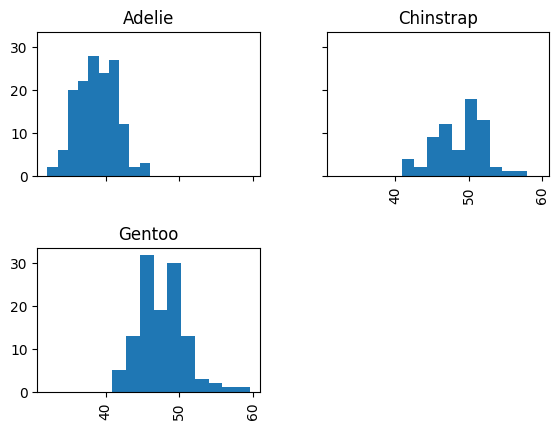

In [11]:
# Show the histogram per bill lenght
df.hist(column='bill_length_mm', by='species', sharex=True, sharey=True)
plt.show()

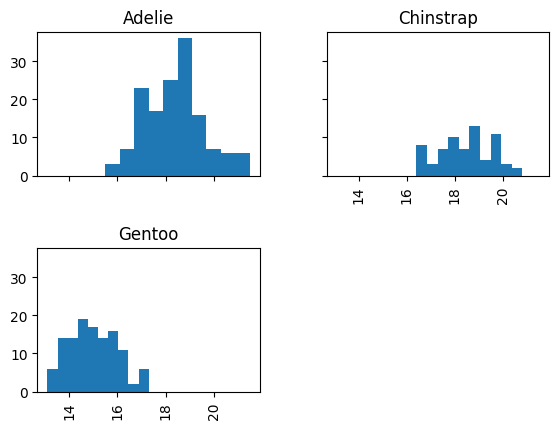

In [12]:
# Show the histogram per bill depth
df.hist(column='bill_depth_mm', by='species', sharex=True, sharey=True)
plt.show()

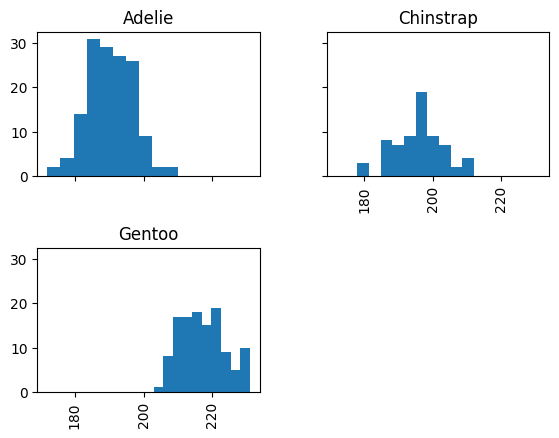

In [13]:
# Show the histogram per flipper length
df.hist(column='flipper_length_mm', by='species', sharex=True, sharey=True)
plt.show()

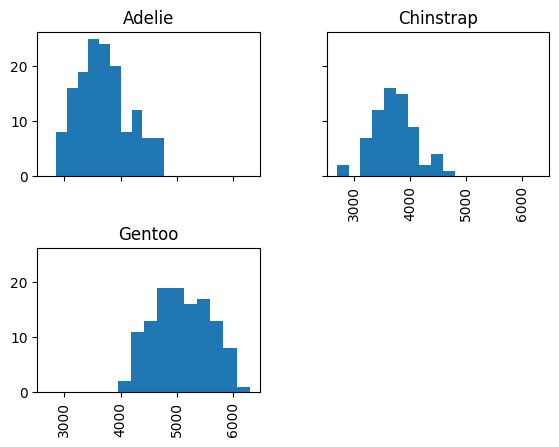

In [14]:
# Show a boxplot of body mass per species
df.hist(column='body_mass_g', by='species', sharex=True, sharey=True)
plt.show()

In [17]:
# Show a bivariate plot of bill length and bill depth
fig = px.scatter(df, x= 'bill_length_mm', y= 'bill_depth_mm')
fig.show()

In [18]:
# Is there a way to be more effective?
fig = px.scatter(df, x= 'bill_length_mm', y= 'bill_depth_mm', color= 'species')
fig.show()

In [19]:
fig = px.scatter_matrix(df, dimensions= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], color= 'species')
fig.show()

In [20]:
# What percentage of Gentoo penguins weights less than 5000 (visually)
# Use ecdf = empiric cumulative distribution function
fig = px.ecdf(df[df['species'] == 'Gentoo'], x= 'body_mass_g')
fig.show()

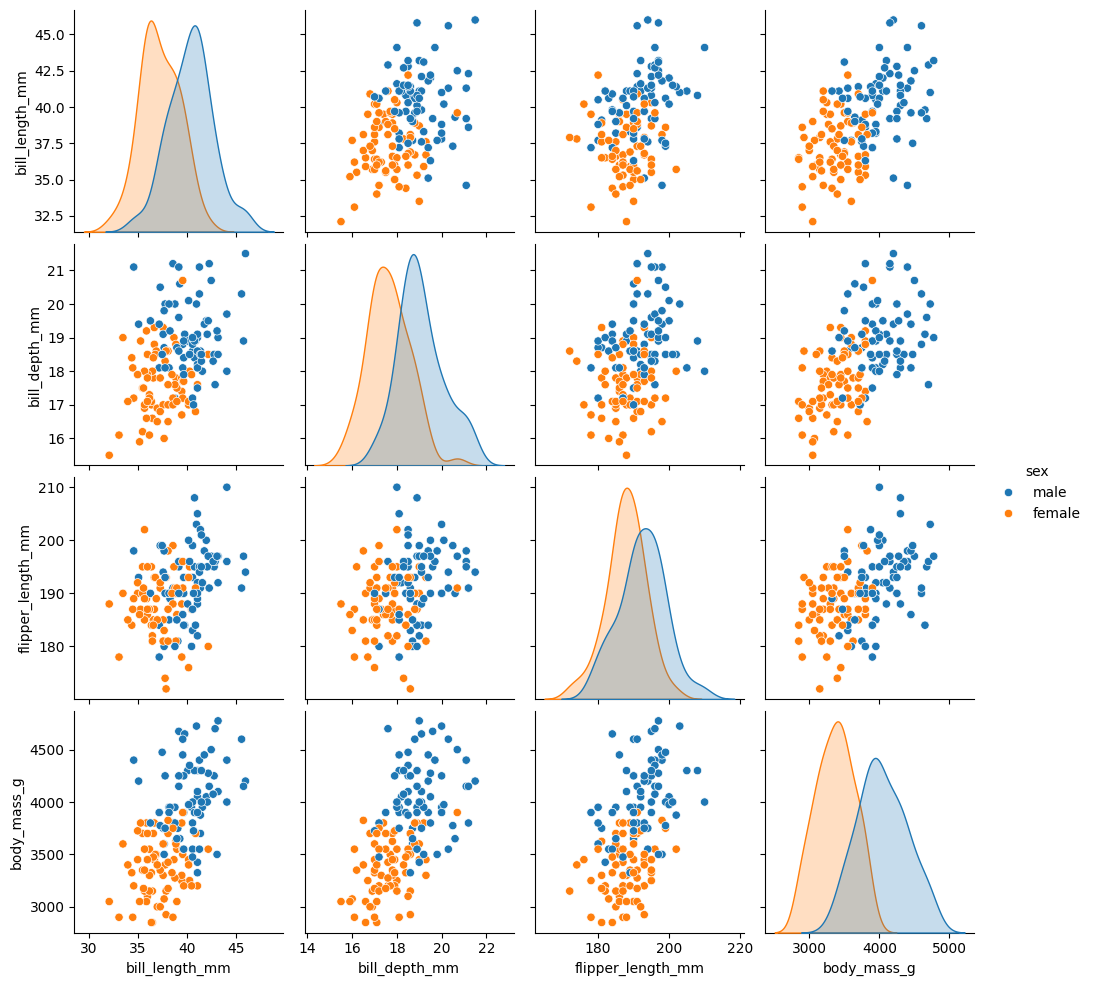

In [25]:
sns.pairplot(data=df[df['species'] == 'Adelie'], hue='sex')
plt.show()

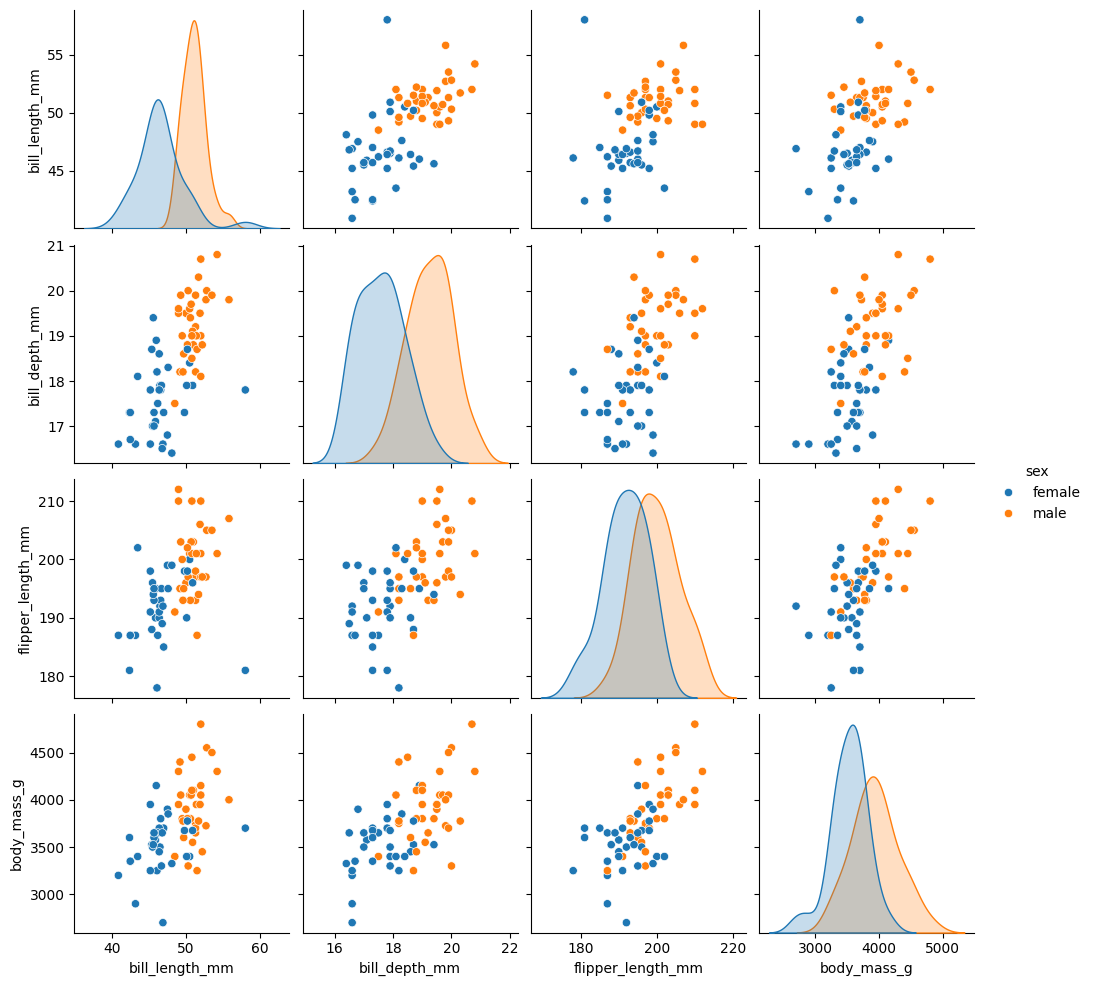

In [26]:
sns.pairplot(data=df[df['species'] == 'Chinstrap'], hue='sex')
plt.show()

In [30]:
display(df[(df['species'] == 'Chinstrap') & (df['sex'] == 'male')].describe())
display(df[(df['species'] == 'Chinstrap') & (df['sex'] == 'female')].describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,34.000000,34.000000,34.000000,34.000000
mean,51.094118,19.252941,199.911765,3938.970588
std,1.564558,0.761273,5.976558,362.137550
min,48.500000,17.500000,187.000000,3250.000000
25%,50.050000,18.800000,196.000000,3731.250000
50%,50.950000,19.300000,200.500000,3950.000000
75%,51.975000,19.800000,203.000000,4100.000000
max,55.800000,20.800000,212.000000,4800.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,34.000000,34.000000,34.000000,34.000000
mean,46.573529,17.588235,191.735294,3527.205882
std,3.108669,0.781128,5.754096,285.333912
min,40.900000,16.400000,178.000000,2700.000000
25%,45.425000,17.000000,187.250000,3362.500000
50%,46.300000,17.650000,192.000000,3550.000000
75%,47.375000,18.050000,195.750000,3693.750000
max,58.000000,19.400000,202.000000,4150.000000


In [34]:
# Check the variations according to the "Adelie" spice and the islands
display(df[(df['species'] == 'Adelie') & (df['island'] == 'Biscoe')].describe())
display(df[(df['species'] == 'Adelie') & (df['island'] == 'Dream')].describe())
display(df[(df['species'] == 'Adelie') & (df['island'] == 'Torgersen')].describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,44.000000,44.000000,44.000000,44.000000
mean,38.975000,18.370455,188.795455,3709.659091
std,2.480916,1.188820,6.729247,487.733722
min,34.500000,16.000000,172.000000,2850.000000
25%,37.675000,17.650000,184.750000,3387.500000
50%,38.700000,18.450000,189.500000,3750.000000
75%,40.700000,19.025000,193.000000,3975.000000
max,45.600000,21.100000,203.000000,4775.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,55.000000,55.000000,55.000000,55.000000
mean,38.520000,18.240000,189.927273,3701.363636
std,2.484276,1.140598,6.480325,448.774519
min,32.100000,15.500000,178.000000,2900.000000
25%,36.700000,17.500000,185.500000,3400.000000
50%,38.800000,18.400000,190.000000,3600.000000
75%,40.450000,18.800000,193.000000,3987.500000
max,44.100000,21.200000,208.000000,4650.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,47.000000,47.000000,47.000000,47.000000
mean,39.038298,18.451064,191.531915,3708.510638
std,3.028097,1.346472,6.220062,451.846351
min,33.500000,15.900000,176.000000,2900.000000
25%,36.650000,17.450000,187.500000,3337.500000
50%,39.000000,18.400000,191.000000,3700.000000
75%,41.100000,19.250000,195.500000,4000.000000
max,46.000000,21.500000,210.000000,4700.000000


In [39]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha
# H0: no hay diferencia entre los pinguinos Adelie de cada isla
# H1: si hay diferencia en al menos dos pinguinos de las islas
adelie_dream = df[(df['species'] == 'Adelie') & (df['island'] == 'Dream')]['body_mass_g']
adelie_biscoe = df[(df['species'] == 'Adelie') & (df['island'] == 'Biscoe')]['body_mass_g']
adelie_torgersen = df[(df['species'] == 'Adelie') & (df['island'] == 'Torgersen')]['body_mass_g']

f_statistic, p_value = f_oneway(adelie_dream, adelie_biscoe, adelie_torgersen)
print(f"f_statistic: {f_statistic} - p_value: {p_value}")
print("Se acepta H1")

f_statistic: 0.004838458443284365 - p_value: 0.9951733909544992
Se acepta H1


In [40]:
# Show the boxplot of Adelie penguins by island
fig = px.box(df[df['species'] == 'Adelie'], x='species', y='body_mass_g', color='island')
fig.show()

In [21]:
# Check if there is a bimodal distribution of the "body_mass_g" by sex of the Adelie species
#df[df['species'] == 'Adelie'].hist()
fig = px.histogram(df[df['species'] == 'Adelie'], x= 'body_mass_g', color= 'sex')
fig.show()
#plt.plot()